In [1]:
#Intalação De Dependencias
#!pip install pandas
#!pip install geopandas
#!pip install seaborn
#!pip install matplotlib

#Importando As Dependencias
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Ler o Arquivo CSV
planilha = pd.read_csv("C:\\Users\\BlueShift\\Downloads\\Python\\Imobiliaria\\Dataset.csv")

#Exibir as primeiras linhas da Planilha
planilha.head()

,Nome,Sobrenome,Email,UF,Cidade,Genero,Renda Média,Escolaridade,Estado Civil
0,Sergio,Costa,eduardo.oliveira@exemplo.com,DF,Brasília,Masculino,R$ 6.001 - R$ 8.000,Ensino Superior,Viúvo(a)
1,Eduardo,Melo,quintino.melo@exemplo.com,PE,Recife,Masculino,R$ 6.001 - R$ 8.000,Doutorado,Divorciado(a)
2,Sergio,Pereira,olivia.freitas@exemplo.com,CE,Fortaleza,Feminino,R$ 2.001 - R$ 4.000,Ensino Médio,Solteiro(a)
3,Gustavo,Oliveira,gustavo.melo@exemplo.com,SP,São Paulo,Feminino,R$ 2.001 - R$ 4.000,Doutorado,Viúvo(a)
4,Juliana,Oliveira,carlos.almeida@exemplo.com,DF,Brasília,Masculino,Acima de R$ 10.000,Ensino Superior,Divorciado(a)


In [2]:
#Função para tratar os intervalos de renda
def calcular_media_renda(renda):
    renda = renda.replace('R$', '').replace(' ', '')
    
    #Tratar Salarios acima de 10.000
    if 'Acimade' in renda:
        return 10000

    #Tratar o Fator de Ter 2 Valores em Salarios e Efetuar a Média entre eles
    if '-' in renda:
        valores = renda.split('-')
        min_valor = int(valores[0].replace('.', ''))
        max_valor = int(valores[1].replace('.', ''))
        return (min_valor + max_valor) // 2
    return None

#Aplicar a função na coluna 'Renda Média'
planilha['Renda Media Calculada'] = planilha['Renda Média'].apply(calcular_media_renda)

#Agrupar por estado e calcular a média de renda por estado
media_por_estado = planilha.groupby('UF')['Renda Media Calculada'].mean()
mediana_por_estado = planilha.groupby('UF')['Renda Media Calculada'].median()

#Verificar a Media de Renda por Estado
#print(media_por_estado)

#Tratar a Saida dos dados
#for estado, media in media_por_estado.items():
#    print(f'UF: {estado}, Renda Média: R$ {media:.2f}')

#Saida dos Dados, porem com organização do Maior numero para o menor
for estado, media in sorted(media_por_estado.items(), key=lambda item: item[1], reverse=True):
    print(f'UF: {estado}, Renda Média: R$ {media:.2f}')

for estado, media in sorted(mediana_por_estado.items(), key=lambda item: item[1], reverse=True):
    print(f'UF: {estado}, Renda Mediana: R$ {media:.2f}')

UF: RN, Renda Média: R$ 6930.23
UF: AM, Renda Média: R$ 6416.67
UF: PE, Renda Média: R$ 6413.79
UF: DF, Renda Média: R$ 6394.23
UF: MA, Renda Média: R$ 6348.21
UF: GO, Renda Média: R$ 6345.45
UF: BA, Renda Média: R$ 6306.82
UF: SC, Renda Média: R$ 6157.89
UF: RJ, Renda Média: R$ 6096.77
UF: TO, Renda Média: R$ 5928.57
UF: MS, Renda Média: R$ 5884.06
UF: CE, Renda Média: R$ 5863.64
UF: SP, Renda Média: R$ 5836.73
UF: MG, Renda Média: R$ 5830.51
UF: PI, Renda Média: R$ 5690.48
UF: PR, Renda Média: R$ 5609.09
UF: RS, Renda Média: R$ 5583.33
UF: PA, Renda Média: R$ 5510.64
UF: RN, Renda Mediana: R$ 9000.00
UF: AM, Renda Mediana: R$ 7000.00
UF: BA, Renda Mediana: R$ 7000.00
UF: DF, Renda Mediana: R$ 7000.00
UF: GO, Renda Mediana: R$ 7000.00
UF: MA, Renda Mediana: R$ 7000.00
UF: PE, Renda Mediana: R$ 7000.00
UF: RJ, Renda Mediana: R$ 7000.00
UF: SC, Renda Mediana: R$ 7000.00
UF: SP, Renda Mediana: R$ 7000.00
UF: CE, Renda Mediana: R$ 5000.00
UF: MG, Renda Mediana: R$ 5000.00
UF: MS, Renda Me

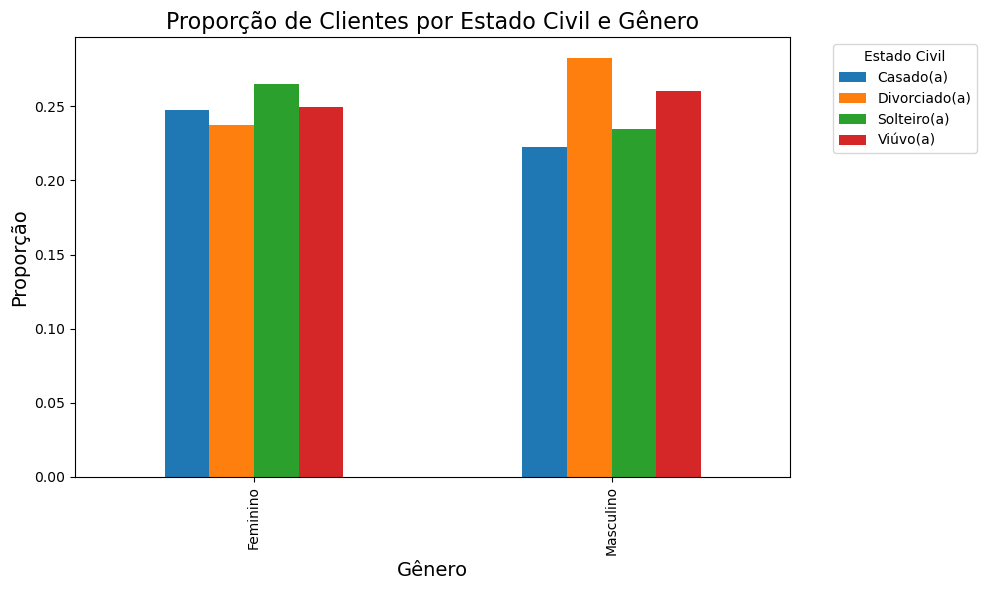

In [20]:
#Agrupa por Gênero e Estado Civil, depois calcula o total de clientes em cada combinação
proporcoes_estado_civil_genero = planilha.groupby(['Genero', 'Estado Civil']).size().unstack(fill_value=0)

#Calcular as proporções dentro de cada grupo de gênero
proporcoes_estado_civil_genero = proporcoes_estado_civil_genero.div(proporcoes_estado_civil_genero.sum(axis=1), axis=0)

#Resetar o índice para facilitar a plotagem
proporcoes_estado_civil_genero = proporcoes_estado_civil_genero.reset_index()

#Gráfico de barras lado a lado (não empilhadas) para as proporções calculadas, Stacked=False
ax = proporcoes_estado_civil_genero.set_index('Genero').plot(kind='bar', stacked=False, figsize=(10, 6))

#Adicionar título e rótulos com fontes ajustadas
plt.title('Proporção de Clientes por Estado Civil e Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Proporção', fontsize=14)

#Ajustar a legenda e posicioná-la fora do gráfico
plt.legend(title='Estado Civil', bbox_to_anchor=(1.05, 1), loc='upper left')

#Ajustar layout para evitar sobreposição
plt.tight_layout()

#Exibir o gráfico
plt.show()

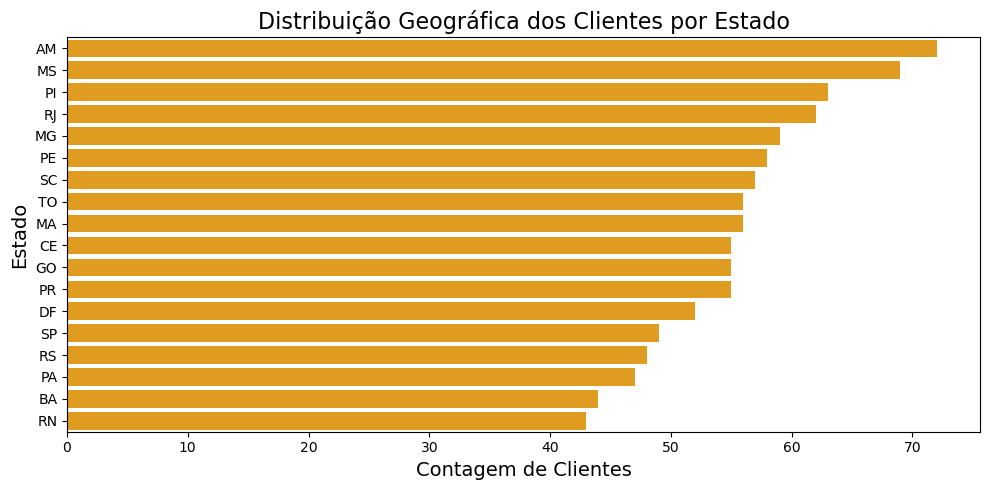

In [4]:
#Contador De Cliente por Estado
clientes_uf = planilha['UF'].value_counts().reset_index()
clientes_uf.columns = ['UF', 'Contagem']

#Ordenar Maior para Menor
clientes_uf = clientes_uf.sort_values(by='Contagem', ascending=False)

#Tamanho do Grafico
plt.figure(figsize=(10, 5))

#Distribuição Geografica De Clientes por Estado, em Barras
sns.barplot(x='Contagem', y='UF', data=clientes_uf, color='orange')

#Adições da Parte Visual
plt.title('Distribuição Geográfica dos Clientes por Estado', fontsize=16)
plt.xlabel('Contagem de Clientes', fontsize=14)
plt.ylabel('Estado', fontsize=14)

#Exibir
plt.tight_layout()
plt.show()

#Gráfico em Pizza, Alternativo Desing
#plt.figure(figsize=(10, 7))
#plt.pie(clientes_uf['Contagem'], labels=clientes_uf['UF'], autopct='%1.1f%%', startangle=140)
#plt.title('Distribuição Geográfica dos Clientes por Estado (UF)')
#plt.axis('equal')  # Para manter a proporção do gráfico em pizza
#plt.show()

In [5]:
#Puxar a Função Planilha usada no Exercicio 2
#planilha['Renda Media Calculada'] = planilha['Renda Média'].apply(calcular_media_renda)

#Calculo de Media, Já usado antes acima
renda_media = planilha['Renda Media Calculada'].mean()

#Para Printar a Renda Media Mais Baixa
abaixo_media = planilha[planilha['Renda Media Calculada']< renda_media]
abaixo_media

,Nome,Sobrenome,Email,UF,Cidade,Genero,Renda Média,Escolaridade,Estado Civil,Renda Media Calculada
2,Sergio,Pereira,olivia.freitas@exemplo.com,CE,Fortaleza,Feminino,R$ 2.001 - R$ 4.000,Ensino Médio,Solteiro(a),3000
3,Gustavo,Oliveira,gustavo.melo@exemplo.com,SP,São Paulo,Feminino,R$ 2.001 - R$ 4.000,Doutorado,Viúvo(a),3000
5,Olivia,Freitas,igor.santos@exemplo.com,CE,Fortaleza,Masculino,R$ 1.000 - R$ 2.000,Ensino Superior,Divorciado(a),1500
7,Bruno,Freitas,mariana.silva@exemplo.com,MA,São Luís,Feminino,R$ 2.001 - R$ 4.000,Pós-Graduação,Casado(a),3000
10,Ana,Almeida,sergio.pereira@exemplo.com,RS,Porto Alegre,Feminino,R$ 1.000 - R$ 2.000,Mestrado,Viúvo(a),1500
...,...,...,...,...,...,...,...,...,...,...
988,Tatiana,Gomes,juliana.silva@exemplo.com,PI,Teresina,Masculino,R$ 1.000 - R$ 2.000,Mestrado,Solteiro(a),1500
990,Pedro,Souza,sergio.freitas@exemplo.com,MA,São Luís,Feminino,R$ 2.001 - R$ 4.000,Ensino Médio,Casado(a),3000
995,Ana,Souza,helena.souza@exemplo.com,GO,Goiânia,Feminino,R$ 2.001 - R$ 4.000,Mestrado,Casado(a),3000
997,Karen,Gomes,nicolas.pereira@exemplo.com,TO,Palmas,Feminino,R$ 4.001 - R$ 6.000,Ensino Superior,Viúvo(a),5000


In [6]:
#Para Printar a Renda Media Mais Alta
acima_renda = planilha[planilha['Renda Media Calculada']> renda_media]
acima_renda

,Nome,Sobrenome,Email,UF,Cidade,Genero,Renda Média,Escolaridade,Estado Civil,Renda Media Calculada
0,Sergio,Costa,eduardo.oliveira@exemplo.com,DF,Brasília,Masculino,R$ 6.001 - R$ 8.000,Ensino Superior,Viúvo(a),7000
1,Eduardo,Melo,quintino.melo@exemplo.com,PE,Recife,Masculino,R$ 6.001 - R$ 8.000,Doutorado,Divorciado(a),7000
4,Juliana,Oliveira,carlos.almeida@exemplo.com,DF,Brasília,Masculino,Acima de R$ 10.000,Ensino Superior,Divorciado(a),10000
6,Mariana,Oliveira,eduardo.souza@exemplo.com,TO,Palmas,Feminino,R$ 6.001 - R$ 8.000,Ensino Superior,Casado(a),7000
8,Tatiana,Santos,gustavo.freitas@exemplo.com,SC,Florianópolis,Feminino,R$ 8.001 - R$ 10.000,Pós-Graduação,Viúvo(a),9000
...,...,...,...,...,...,...,...,...,...,...
992,Juliana,Souza,nicolas.oliveira@exemplo.com,SP,São Paulo,Masculino,R$ 6.001 - R$ 8.000,Ensino Fundamental,Divorciado(a),7000
993,Eduardo,Santos,mariana.freitas@exemplo.com,MS,Campo Grande,Feminino,Acima de R$ 10.000,Pós-Graduação,Solteiro(a),10000
994,Igor,Silva,sergio.melo@exemplo.com,PI,Teresina,Masculino,R$ 8.001 - R$ 10.000,Pós-Graduação,Viúvo(a),9000
996,Bruno,Costa,sergio.gomes@exemplo.com,PI,Teresina,Masculino,Acima de R$ 10.000,Ensino Médio,Viúvo(a),10000


In [7]:
#Do mesmo jeito que eu fiz na Atividade 3, Porem agora sem pedir para a Relação De Estado Civil vir tambem com o Genero
relacao_estado_civil = planilha['Estado Civil'].value_counts().index

#For para Descrever as chamadas que foi feita no CSV
for dado in relacao_estado_civil:
 print(dado, planilha[planilha['Estado Civil'] == dado]['Renda Media Calculada'].mean(), planilha[planilha['Estado Civil'] == dado]['Renda Media Calculada'].median())

Divorciado(a) 5882.692307692308 7000.0
Viúvo(a) 6270.588235294118 7000.0
Solteiro(a) 6000.0 7000.0
Casado(a) 6091.489361702128 7000.0
